In [1]:
import graphlab as gl

A newer version of GraphLab Create (v2.1) is available! Your current version is v2.0.1.
You can use pip to upgrade the graphlab-create package. For more information see https://turi.com/products/create/upgrade.


In [2]:
user_data = gl.load_sframe("./user_data_clean/")

This non-commercial license of GraphLab Create for academic use is assigned to rahultyagirt7@outlook.com and will expire on June 03, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.0.1 started. Logging: /tmp/graphlab_server_1469850068.log


In [4]:
# remove rows where country is not mentioned in location
fil = []
for item in user_data["location"]:
    temp = item.split(",")
    if len(temp) <= 2 or temp[2] == "":
        fil.append(False)
    else:
        fil.append(True)
fil = gl.SArray(data=fil)

user_data = user_data[fil]

In [6]:
# loacations where city is not mentioned replace states with name of their country rather than excluding them
# and convert a complete string of location to a list of strings containg city name and country name as elements
def modify(st):
    st = st.split(",")
    if st[1] == " " or st[1] == " n/a":
        st[1] = st[2]
    del(st[0])
    st_0 = st[0].strip() 
    st_1 = st[1].strip()
    lis = [];
    lis.append(st_0)
    lis.append(st_1)
    return lis

user_data["location"] = user_data["location"].apply(modify)

In [7]:
user_data.head()

user_id,location,age
2,"[california, usa]",18
4,"[v.n.gaia, portugal]",17
6,"[california, usa]",61
10,"[wisconsin, spain]",26
11,"[victoria, australia]",14
13,"[barcelona, spain]",26
18,"[rio de janeiro, brazil]",25
20,"[pennsylvania, usa]",19
21,"[alabama, spain]",46
24,"[nrw, germany]",19


In [8]:
book_data = gl.load_sframe("./book_data_clean/")

In [9]:
book_data.head()

book_id,title,author,year,publisher
195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
374157065,Flu: The Story of theGreat Influenza Pandemic ...,Gina Bari Kolata,1999,Farrar Straus Giroux
393045218,The Mummies of Urumchi,E. J. W. Barber,1999,"W. W. Norton &amp,Company ..."
399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
425176428,What If?: The World'sForemost Military ...,Robert Cowley,2000,Berkley Publishing Group
671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks
679425608,Under the Black Flag: TheRomance and the Reality ...,David Cordingly,1996,Random House
074322678X,Where You'll Find Me: AndOther Stories ...,Ann Beattie,2002,Scribner


In [10]:
len(book_data), len(user_data)

(261684, 166077)

In [11]:
rating_data = gl.load_sframe("./explicit_rating_data/")

In [12]:
len(rating_data)

433671

In [13]:
rating_data.head()

User-ID,ISBN,Book-Rating
276726,0155061224,5
276729,052165615X,3
276729,0521795028,6
276736,3257224281,8
276737,0600570967,6
276744,038550120X,7
276745,342310538,10
276747,0060517794,9
276747,0671537458,9
276747,0679776818,8


In [14]:
#select only those rows in rating_data whose user-ids matches with user data ids
rating_data = rating_data.filter_by(user_data["user_id"], "User-ID")

In [15]:
len(rating_data)

299649

In [16]:
#select only those rows in user data for which user ids are present in rating data
user_data = user_data.filter_by(rating_data["User-ID"], "user_id")

In [17]:
len(user_data)

45707

In [18]:
#Do the same with book data
rating_data = rating_data.filter_by(book_data["book_id"], "ISBN")

In [19]:
len(rating_data)

55862

In [20]:
book_data = book_data.filter_by(rating_data["ISBN"], "book_id")

In [21]:
len(book_data)

31562

In [22]:
rating_data.rename({"User-ID":"user_id", "ISBN":"book_id", "Book-Rating":"ratings"})

user_id,book_id,ratings
276729,052165615X,3
276747,1885408226,7
276762,3453092007,8
276774,3442136644,9
276786,8437606322,8
276786,8478442588,6
276798,3442131340,7
276798,3548603203,6
276800,1562827898,7
276813,8423996565,8


In [23]:
#join all three datasets on common user_ids and book_ids
complete_data = rating_data.join(user_data, on="user_id")

complete_data = complete_data.join(book_data, on="book_id")

In [24]:
#list type columns not accepted by linear regression model, therfore need to convert locations back to string
def modify(lis):
    st = ""
    flag = 0
    for i in lis:
        if flag == 0:
            st += i
            st += ", "
            flag = 1
        else:
            st += i
    return st

complete_data["location"] = complete_data["location"].apply(modify)

In [25]:
complete_data

user_id,book_id,ratings,location,age,title,author,year
276729,052165615X,3,"croatia, croatia",16,Help!: Level 1,Philip Prowse,1999
276747,1885408226,7,"iowa, usa",25,The Golden Rule ofSchmoozing ...,Aye Jaye,1998
276762,3453092007,8,"nordrhein-westfalen,germany ...",25,Die zweite Haut.,Dean Koontz,1995
276774,3442136644,9,"bern, switzerland",28,Endlich Nichtraucher.,Allen Carr,1992
276786,8437606322,8,"madrid, spain",34,Anna Karenina,Leo Tolstoy,1999
276786,8478442588,6,"madrid, spain",34,El Elogio de La Sombra,Tanazaki,1998
276798,3442131340,7,"baden-wuerttemberg,germany ...",31,Ein Fall f�?¼r KayScarpetta / Ein Mord ...,Patricia Cornwell,2001
276798,3548603203,6,"baden-wuerttemberg,germany ...",31,Artemis Fowl.,Eoin Colfer,2003
276800,1562827898,7,"otago, new zealand",23,Storm Surge: A Quin St.James and Mike McCleary ...,T. J. MacGregor,1993
276813,8423996565,8,"barcelona, spain",29,La hija del Caníbal,Rosa Montero,1998


In [32]:
#data on which model is to be trained contains 55862 rows. To ensure that model will perform well only five columns
#are choosen to be used as feature values. If there would have been more data "title" column could also be included
#in feature columns
features_cols = ["publisher", "age", "location", "title", "author", "year"]

In [33]:
#following four lines of code extract users at random who has rated books greater than 8(high rating) 
high_rated_data = complete_data[complete_data["ratings"] >= 8]
low_rated_data = complete_data[complete_data["ratings"] < 8]
train_data_1, test_data = gl.recommender.util.random_split_by_user(high_rated_data, 
                                                                         user_id="user_id", item_id="book_id")
train_data = train_data_1.append(low_rated_data)

In [ ]:
#prototype model trained over 80% of availble data(train data) for evaluation (20% test data)
#prototype_model = gl.linear_regression.create(train_data, features=features_cols, 
#                                              target="ratings", max_iterations=3000, verbose=True)

In [40]:
prototype_model.evaluate(test_data)

{'max_error': 7.555818658241444, 'rmse': 1.9080914005599718}

In [41]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

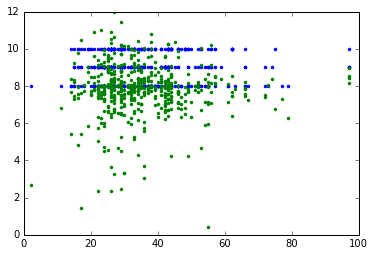

In [42]:
plt.plot(test_data["age"], test_data["ratings"], ".",
        test_data["age"], prototype_model.predict(test_data), ".")

In [43]:
len(prototype_model.coefficients)

53702

In [ ]:
#regression_model = gl.linear_regression.create(complete_data, features=features_cols, target="ratings", 
#                                               max_iterations=5000)

In [87]:
regression_model.evaluate(test_data)

{'max_error': 5.264048332216115, 'rmse': 1.2149543411303971}

In [88]:
regression_model.save("./regression_model_file")

# Predict ratings for new user

In [1]:
import graphlab as gl

A newer version of GraphLab Create (v2.1) is available! Your current version is v2.0.1.
You can use pip to upgrade the graphlab-create package. For more information see https://turi.com/products/create/upgrade.


In [2]:
regression_model = gl.load_model("./regression_model_file/")

book_data = gl.load_sframe("./book_data_clean/")

implicit_data = gl.load_sframe("./implicit_rating_data/")

book_data.filter_by(implicit_data["ISBN"], "book_id")

This non-commercial license of GraphLab Create for academic use is assigned to rahultyagirt7@outlook.com and will expire on June 03, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.0.1 started. Logging: /tmp/graphlab_server_1469856736.log


In [6]:
from operator import itemgetter
"""
This function takes as argument user's age and location(consisting state) and outputs two lists one containing ids
of recommended books and other list contains title of recommended books. Currently, it only choose a movie among 
first 3000 movies from IMPLICIT test dataset having total movies 45000.(Note that model was trained on explicit 
dataset which is different from implicit dataset).
Count of movies can be increased(by modifiying max variable) if required to search among more movies, but it will take considerable time
depending on the machine this function is evaluated upon.
"""
def predict(location, age, search_over=3000):
    predicted_ratings = []
    count = 0
    for book in book_data:
        if count == search_over:
            break
        count += 1
        book["location"] = location
        book["age"] = age
        rating = regression_model.predict(book)[0]
        if rating >= 8.0:
            predicted_ratings.append((book["book_id"], rating))
    
    predicted_ratings = sorted(predicted_ratings, key=itemgetter(1), reverse=True)

    #recommeded books in decresing values of ratings
    recommended_books_id = []
    for i in range(5):
        recommended_books_id.append(predicted_ratings[i][0])

    recommended_books = []
    for book in recommended_books_id:
        for item in book_data:
            if book in item["book_id"]:
                del(item["book_id"])
                recommended_books.append(item)
                break
    return recommended_books_id, recommended_books

In [7]:
ids, books = predict("delhi, india", 21)

In [8]:
books

[{'author': 'Patricia C. Wrede',
  'publisher': 'Point Fantasy',
  'title': 'Calling on Dragons (Read with Me Paperbacks)',
  'year': 1994},
 {'author': 'Patricia C. Wrede',
  'publisher': 'Point Fantasy',
  'title': 'Talking to Dragons (Enchanted Forest Chronicles (Paperback))',
  'year': 1995},
 {'author': 'Larry King',
  'publisher': 'Turner Pub',
  'title': 'The Best of Larry King Live: The Greatest Interviews',
  'year': 1995},
 {'author': 'Langston Hughes',
  'publisher': 'Hill &amp',
  'title': 'The Return of Simple',
  'year': 1995},
 {'author': 'James Patterson',
  'publisher': 'Replica Books',
  'title': 'When the Wind Blows',
  'year': 1998}]